In [1]:
import yfinance as yf

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import math

In [5]:
#import numpy as geek  

In [6]:
import matplotlib.pyplot as plt

In [7]:
import pandas_datareader as web

In [8]:
import statsmodels.api as sm

In [9]:
import time
import datetime
from dateutil.relativedelta import relativedelta
from datetime import date

In [10]:
pd.set_option('mode.use_inf_as_na', True)

In [11]:
stock = 'qcom'

short_moving_average_span = 20
long_moving_average_span = 50
cutoff=0.50
invest = 100
years_of_data_to_process = 25
period = 15

In [12]:
currentDateTime = datetime.datetime.now()
date = currentDateTime.date()
#print (date)

year = date.strftime("%Y")
start_year =  int(year) - years_of_data_to_process
start = datetime.datetime(start_year, 1, 1)
print (start)

1996-01-01 00:00:00


In [13]:
#data =  yf.download(stock, start=start)

In [14]:
#data = web.DataReader(stock, data_source='yahoo', start = start, end = date)

In [15]:
data = pd.read_csv(".\\data\\" + stock.upper() + ".csv")
#data['Date'] = pd.to_datetime(data['Date']).dt.date
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1991-12-13,0.531250,0.593750,0.523438,0.562500,0.375839,143667200
1,1991-12-16,0.562500,0.578125,0.539063,0.554688,0.370619,22585600
2,1991-12-17,0.578125,0.578125,0.546875,0.554688,0.370619,16176000
3,1991-12-18,0.554688,0.570313,0.554688,0.570313,0.381059,10899200
4,1991-12-19,0.570313,0.570313,0.546875,0.546875,0.365399,7299200
...,...,...,...,...,...,...,...
7451,2021-07-15,144.119995,144.139999,140.720001,141.460007,141.460007,6667400
7452,2021-07-16,141.869995,142.509995,139.529999,139.710007,139.710007,5913300
7453,2021-07-19,138.320007,138.899994,136.809998,138.789993,138.789993,9371300
7454,2021-07-20,139.020004,140.419998,137.199997,139.550003,139.550003,6017700


In [16]:

#pd.to_datetime(df["TimeReviewed"])#data[(data['Date'].values.strftime("%Y").dt.year >= start)]
data["Date"] = pd.to_datetime(data["Date"])
data = data[data['Date'].dt.year >= int(start.strftime("%Y"))]
data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
1023,1996-01-02,2.671875,2.734375,2.640625,2.734375,1.826995,8492800
1024,1996-01-03,2.734375,2.750000,2.585938,2.601563,1.738257,12528000
1025,1996-01-04,2.609375,2.625000,2.445313,2.492188,1.665177,21673600
1026,1996-01-05,2.472656,2.617188,2.445313,2.593750,1.733036,22104000
1027,1996-01-08,2.585938,2.625000,2.546875,2.550781,1.704325,2376000
1028,1996-01-09,2.570313,2.570313,2.367188,2.375000,1.586876,21417600
1029,1996-01-10,2.343750,2.523438,2.308594,2.390625,1.597316,31032000
1030,1996-01-11,2.406250,2.539063,2.406250,2.515625,1.680836,15171200
1031,1996-01-12,2.515625,2.539063,2.359375,2.375000,1.586876,24736000
1032,1996-01-15,2.390625,2.390625,2.218750,2.242188,1.498137,29424000


In [17]:
df = data["Close"].pct_change() * 100
#df.describe()

In [18]:
#df = df.rename(columns = "Today_Change_%")
#df
#df = df.reset_index()

In [19]:
#df1 = pd.merge(data,df, on="Date")
data["Today_Change_%"] = df
#data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')
df1 = data
df1.reset_index()
#df1.info()
print(df1)

           Date        Open        High         Low       Close   Adj Close  \
1023 1996-01-02    2.671875    2.734375    2.640625    2.734375    1.826995   
1024 1996-01-03    2.734375    2.750000    2.585938    2.601563    1.738257   
1025 1996-01-04    2.609375    2.625000    2.445313    2.492188    1.665177   
1026 1996-01-05    2.472656    2.617188    2.445313    2.593750    1.733036   
1027 1996-01-08    2.585938    2.625000    2.546875    2.550781    1.704325   
...         ...         ...         ...         ...         ...         ...   
7451 2021-07-15  144.119995  144.139999  140.720001  141.460007  141.460007   
7452 2021-07-16  141.869995  142.509995  139.529999  139.710007  139.710007   
7453 2021-07-19  138.320007  138.899994  136.809998  138.789993  138.789993   
7454 2021-07-20  139.020004  140.419998  137.199997  139.550003  139.550003   
7455 2021-07-21  139.650000  142.220000  139.650000  142.170000  142.170000   

        Volume  Today_Change_%  
1023   8492800    

<ipython-input-19-de18925cebe0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Today_Change_%"] = df


In [20]:
#df1.dropna(inplace= True)
df1.insert(7,'Volume_Lag', None)
df1.Volume = df1.Volume.pct_change() * 100
#df1.Volume = df1.Volume *  geek.sign(df1.Volume.values)
df1['Volume_Lag'] = df1.Volume.shift(1).values


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
<ipython-input-20-5040f8ba1173>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Volume_Lag'] = df1.Volume.shift(1).values


In [21]:
df1["Trend"] =  (df1["Close"] - df1["Low"])/ ((df1["High"] - df1["Low"]))


<ipython-input-21-3b3e399ba3ed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Trend"] =  (df1["Close"] - df1["Low"])/ ((df1["High"] - df1["Low"]))


In [22]:
df1["Trend_Lag"] = df1["Trend"].shift(1)

<ipython-input-22-41a791f20b68>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Trend_Lag"] = df1["Trend"].shift(1)


In [23]:
#df1['Close-Open'] =  df1['Close'] - df1['Open']
#df1['Close-Open_Lag'] = df1['Close-Open'].shift(1)
#df1.insert(13,'High-Low_Change_%', None)
df1['High-Low_Change_%'] = (df1['High'].pct_change() + df1['Low'].pct_change()).shift(1)
df1

<ipython-input-23-3cb38a72ee41>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['High-Low_Change_%'] = (df1['High'].pct_change() + df1['Low'].pct_change()).shift(1)


,Date,Open,High,Low,Close,Adj Close,Volume,Volume_Lag,Today_Change_%,Trend,Trend_Lag,High-Low_Change_%
1023,1996-01-02,2.671875,2.734375,2.640625,2.734375,1.826995,NaN,NaN,NaN,1.000000,NaN,NaN
1024,1996-01-03,2.734375,2.750000,2.585938,2.601563,1.738257,47.513188,NaN,-4.857125,0.095238,1.000000,NaN
1025,1996-01-04,2.609375,2.625000,2.445313,2.492188,1.665177,73.001277,47.513188,-4.204203,0.260870,0.095238,-0.014996
1026,1996-01-05,2.472656,2.617188,2.445313,2.593750,1.733036,1.985826,73.001277,4.075214,0.863633,0.260870,-0.099835
1027,1996-01-08,2.585938,2.625000,2.546875,2.550781,1.704325,-89.250814,1.985826,-1.656636,0.049997,0.863633,-0.002976
...,...,...,...,...,...,...,...,...,...,...,...,...
7451,2021-07-15,144.119995,144.139999,140.720001,141.460007,141.460007,-41.026208,99.832084,-1.593039,0.216376,0.325521,0.040608
7452,2021-07-16,141.869995,142.509995,139.529999,139.710007,139.710007,-11.310256,-41.026208,-1.237099,0.060405,0.216376,-0.027525
7453,2021-07-19,138.320007,138.899994,136.809998,138.789993,138.789993,58.478345,-11.310256,-0.658517,0.947368,0.060405,-0.019765
7454,2021-07-20,139.020004,140.419998,137.199997,139.550003,139.550003,-35.785857,58.478345,0.547597,0.729815,0.947368,-0.044826


In [24]:
#df1['High-Low'] =  df1['High'] - df1['Low']
#df1['High-Low_Lag'] = df1['High-Low'].shift(1)

In [25]:
df1 = sm.add_constant(df1)
df1["Up_Down"] = [1 if (i > 0) else 0 for i in df1["Today_Change_%"]]

In [26]:
df1.dropna(inplace= True)

In [27]:
df1['Short_MV_Avg_Span'] = df1['Close'].ewm(span=short_moving_average_span, adjust=False).mean()
df1.dropna(inplace= True)
#df1

In [28]:
df1['Long_MV_Avg_Span'] = df1['Close'].ewm(span=long_moving_average_span, adjust=False).mean()
df1.dropna(inplace= True)
#df1

In [29]:
df1['Short_MV_Avg_Span-Long_MV_Avg_Span'] = df1.Short_MV_Avg_Span - df1.Long_MV_Avg_Span
df1['Short_MV_Avg_Span-Long_MV_Avg_Span_Lag'] = df1['Short_MV_Avg_Span-Long_MV_Avg_Span'].shift(1)
#df1

In [30]:
df1.dropna(inplace= True)
#df1.tail(10)

In [31]:
df1.index = pd.RangeIndex(start=0,stop = len(df1), step = 1)
df1.reindex()
#df1.info()

,const,Date,Open,High,Low,Close,Adj Close,Volume,Volume_Lag,Today_Change_%,Trend,Trend_Lag,High-Low_Change_%,Up_Down,Short_MV_Avg_Span,Long_MV_Avg_Span,Short_MV_Avg_Span-Long_MV_Avg_Span,Short_MV_Avg_Span-Long_MV_Avg_Span_Lag
0,1.0,1996-01-05,2.472656,2.617188,2.445313,2.593750,1.733036,1.985826,73.001277,4.075214,0.863633,0.260870,-0.099835,1,2.501861,2.496171,0.005690,0.000000
1,1.0,1996-01-08,2.585938,2.625000,2.546875,2.550781,1.704325,-89.250814,1.985826,-1.656636,0.049997,0.863633,-0.002976,0,2.506520,2.498312,0.008207,0.005690
2,1.0,1996-01-09,2.570313,2.570313,2.367188,2.375000,1.586876,801.414141,-89.250814,-6.891262,0.038459,0.049997,0.044518,0,2.493994,2.493477,0.000517,0.008207
3,1.0,1996-01-10,2.343750,2.523438,2.308594,2.390625,1.597316,44.890184,801.414141,0.657895,0.381817,0.038459,-0.091385,1,2.484149,2.489443,-0.005294,0.000517
4,1.0,1996-01-11,2.406250,2.539063,2.406250,2.515625,1.680836,-51.111111,44.890184,5.228758,0.823526,0.381817,-0.042990,1,2.487147,2.490470,-0.003323,-0.005294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6425,1.0,2021-07-15,144.119995,144.139999,140.720001,141.460007,141.460007,-41.026208,99.832084,-1.593039,0.216376,0.325521,0.040608,0,139.705754,137.464932,2.240823,2.219229
6426,1.0,2021-07-16,141.869995,142.509995,139.529999,139.710007,139.710007,-11.310256,-41.026208,-1.237099,0.060405,0.216376,-0.027525,0,139.706159,137.552974,2.153185,2.240823
6427,1.0,2021-07-19,138.320007,138.899994,136.809998,138.789993,138.789993,58.478345,-11.310256,-0.658517,0.947368,0.060405,-0.019765,0,139.618905,137.601484,2.017421,2.153185
6428,1.0,2021-07-20,139.020004,140.419998,137.199997,139.550003,139.550003,-35.785857,58.478345,0.547597,0.729815,0.947368,-0.044826,1,139.612343,137.677897,1.934446,2.017421


In [32]:
#X = df1[['const','Trend_Lag','Short_MV_Avg_Span-Long_MV_Avg_Span_Lag','Close-Open_Lag','High-Low_Lag','Volume_Lag']]

In [33]:
#df1['Close'][-150:].plot(figsize=(16,6))
#df1['Short_MV_Avg_Span'][-150:].plot(figsize=(16,6))
#df1['Long_MV_Avg_Span'][-150:].plot(figsize=(16,6))
#plt.xlim([len(df1)-100, len(df1)])
#plt.xlabel('Index', fontsize=18)
#plt.ylabel('Close Price USD ($)', fontsize =18)
#plt.legend(['Close', str(short_moving_average_span) + ' Days Moving Average', str(long_moving_average_span) + ' days Moving Average'], loc = 'lower left')
#plt.title("Moving Average for " + stock.upper(), fontsize = 16)
#plt.show
#plt.close

<function matplotlib.pyplot.close(fig=None)>

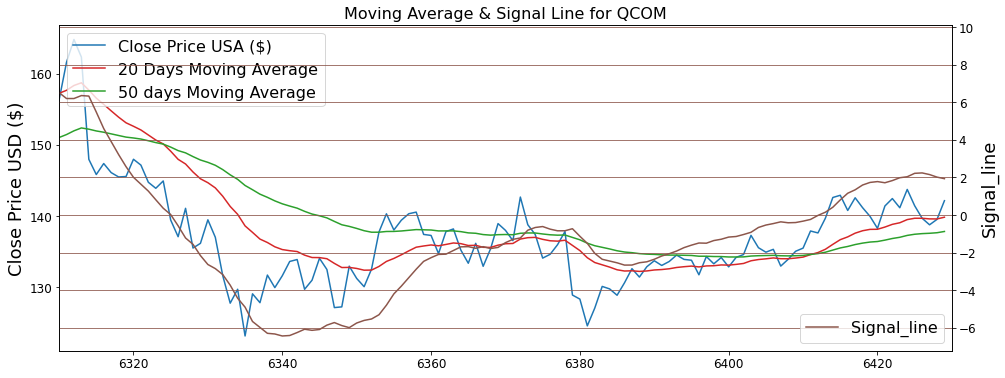

In [34]:
fig, ax1 = plt.subplots()
ax2 =  ax1.twinx()
df1['Close'][-150:].plot(x = 'Index', color='tab:blue', figsize=(16,6), label = 'Close Price USA ($)', fontsize = 12, ax = ax1)
df1['Short_MV_Avg_Span'][-150:].plot(x = 'Index', color='tab:red', figsize=(16,6), label = str(short_moving_average_span) + ' Days Moving Average', fontsize = 12, ax = ax1)
df1['Long_MV_Avg_Span'][-150:].plot(x = 'Index', color='tab:green', figsize=(16,6), label = str(long_moving_average_span) + ' days Moving Average', fontsize = 12, ax = ax1)
df1['Short_MV_Avg_Span-Long_MV_Avg_Span_Lag'][-150:].plot(x = 'Index', color='tab:brown', figsize=(16,6), label = 'Signal_line', fontsize = 12, ax = ax2)
#df1['RSI'][-170:].plot(x = 'Index', color='tab:red', figsize=(16,6), label = 'Relative Strength Index', fontsize = 12,ax = ax1)
#df1['Close'][-150:].plot(x = 'Index',color = 'tab:blue', figsize=(16,6),  label = 'Close Price',fontsize = 12,ax = ax2)
#df1['Close'][-100:].plot(figsize=(16,6))
plt.xlim([len(df1)-120, len(df1)])
ax1.set_ylabel('Close Price USD ($)', fontsize = 18)
ax2.set_ylabel('Signal_line', fontsize = 18)
#df1.xlabel('Index', fontsize=18)
#df1.ylabel('Relative Strength Index', fontsize =18)
ax2.grid(color='tab:brown')
ax1.set_title("Moving Average & Signal Line for " + stock.upper(), fontsize = 16)
ax1.legend(loc=2, fontsize = 16)
ax2.legend(loc=4,fontsize = 16)
plt.show
plt.close

In [35]:
df1['Signal_Line'] = df1['Short_MV_Avg_Span-Long_MV_Avg_Span_Lag'].ewm(span = period, adjust=False ).mean()
#column_list = list(df1)
#print (column_list)
#df1=df1[['const', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Volume_Lag', 'Today_Change_%', 'Trend', 'Trend_Lag', 'Close-Open', 'Close-Open_Lag', 'High-Low', 'High-Low_Lag', 'Up_Down', 'Short_MV_Avg_Span', 'Long_MV_Avg_Span', 'Short_MV_Avg_Span-Long_MV_Avg_Span', 'Short_MV_Avg_Span-Long_MV_Avg_Span_Lag', 'Prediction_Caculated', 'Prediction_indicator', 'share', 'money', 'Up', 'Down', 'Signal_Line']]
df1['Signal_Line_Lag'] =  df1['Signal_Line'].shift(1)
df1.dropna(inplace= True)
#df1.info()

In [36]:
X = df1[['const','Trend_Lag','High-Low_Change_%','Signal_Line_Lag','Volume_Lag']]

In [37]:
y = df1["Up_Down"].values

In [38]:
model = sm.Logit(y,X)

In [39]:
result =  model.fit()

Optimization terminated successfully.
         Current function value: 0.690803
         Iterations 4


In [40]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 6429
Model:                          Logit   Df Residuals:                     6424
Method:                           MLE   Df Model:                            4
Date:                Wed, 21 Jul 2021   Pseudo R-squ.:                0.003369
Time:                        21:51:04   Log-Likelihood:                -4441.2
converged:                       True   LL-Null:                       -4456.2
Covariance Type:            nonrobust   LLR p-value:                 4.835e-06
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2245      0.050      4.525      0.000       0.127       0.322
Trend_Lag            -0.4181      0.084     -4.951      0.000      -0.584      -0.253
High-Low_Change_%    -0.4745      0.534     -0.889      0.374      -1.521       0.572
Signal_Line_Lag      -0.0002      0.012     -0.014      0.989      -0.024       0.024
Volume_Lag           -0.0003      0.000     -0.714      0.475      -0.001       0.001
=====================================================================================
"""

In [41]:
prediction = result.predict(X)

In [42]:
df1['Prediction_Caculated'] = pd.array(prediction)
df1['Prediction_indicator'] = pd.array([1 if i > cutoff else 0 for i in prediction])
#print (df1.iloc[-1,18],df1.iloc[-1,19],df1.iloc[-1,20])

In [43]:
#print(df1.loc[[i for i in range(len(df1)-20, len(df1)+2)],['Trend_Lag', 'Short_MV_Avg_Span-Long_MV_Avg_Span_Lag', 'Up_Down', 'Prediction_indicator']])

In [44]:
y = df1["Up_Down"].values

In [45]:
def confusion_matrix(act,pred):
    predtrans = ['Up' if i > cutoff else 'Down' for i in pred]
    actuals = ['Up' if i > 0 else 'Down' for i in act]
    confusion_matrix = pd.crosstab(pd.Series(actuals),
                                   pd.Series(predtrans),
                                   rownames = ["Actual"],
                                   colnames = ["Predict"]
                                  )
    return confusion_matrix

In [46]:
confusion_matrix(y,prediction)

Predict,Down,Up
Actual,,
Down,1622,1579
Up,1460,1768


In [47]:
z = confusion_matrix(y,prediction)
try:
    print((z.loc['Down','Down'] + z.loc['Up','Up']) / len(df1))
except:
    pass

0.5272981801213252


In [48]:
try:
    print( (z.loc['Down', 'Down']+ z.loc['Up','Up']) / (z.loc['Down', 'Down']+ z.loc['Up','Up'] + z.loc['Down','Up']) )
except:
    pass

0.6822298249144697


In [49]:
df1 = df1.assign(share=np.nan,money=np.nan)
#df1.info()

In [50]:
diff_years = round((df1.iloc[-1,1] - df1.iloc[0,1])/np.timedelta64(1,'Y') + 0.5)   

In [51]:
#df1.info()
#column_list = list(df1)
#print (column_list)
df1['Signal_Line_Lag'] = df1['Signal_Line'].shift(1)
df1=df1[['const', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Volume_Lag', 'Today_Change_%', 'Trend', 'Trend_Lag', 'High-Low_Change_%', 'Up_Down', 'Short_MV_Avg_Span', 'Long_MV_Avg_Span', 'Short_MV_Avg_Span-Long_MV_Avg_Span', 'Short_MV_Avg_Span-Long_MV_Avg_Span_Lag', 'Prediction_Caculated', 'Prediction_indicator', 'share', 'money', 'Signal_Line', 'Signal_Line_Lag']]
#df1.info()

In [52]:
#Simulate Investment transaction buy on opening when predict UP and sell daily average when predict DOWN

def buy_sell(open_price, sell_price,prediction, money, share):
    if prediction == 1 and money != 0:
        share =  money / open_price
        money = 0
    elif prediction == 0 and share != 0:
        money = share * sell_price
        share = 0
    else: pass
    return [money, share]
money = invest
share = 0
for i in range(len(df1)):
    [money, share] = buy_sell(df1.iloc[i,2],(df1.iloc[i,3]+df1.iloc[i,4])/2,df1.iloc[i,19], money, share)
    df1.iloc[i,20] = share
    df1.iloc[i,21] = money

In [53]:
#df1.info()

In [54]:
df1 = df1.assign(Up=np.nan,Down=np.nan)
#df1.info()

In [55]:
for i in range(len(df1)):
    if df1.iloc[i,9] <= 0:
        df1.iloc[i,24] = 0
        df1.iloc[i,25] = df1.iloc[i,9]
    else:
        df1.iloc[i,25] = 0
        df1.iloc[i,24] = df1.iloc[i,9]

AVG_Gain = df1.Up.ewm(span=period, adjust=False).mean()
AVG_Loss = df1.Down.ewm(span=period, adjust=False).mean().abs()

In [56]:
RS = AVG_Gain /AVG_Loss
RSI = 100.0 - (100.0 / (1.0 + RS))
df1['RSI'] = RSI
df1['RSI_Lag'] = df1['RSI'].shift(1)
#df1.tail(10)

<function matplotlib.pyplot.close(fig=None)>

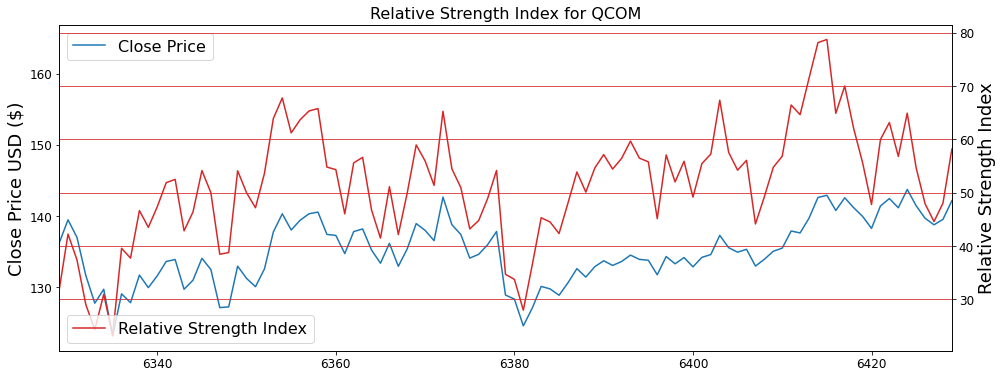

In [57]:
fig, ax1 = plt.subplots()
ax2 =  ax1.twinx()
df1['RSI'][-170:].plot(x = 'Index', color='tab:red', figsize=(16,6), label = 'Relative Strength Index', fontsize = 12,ax = ax2)
df1['Close'][-150:].plot(x = 'Index',color = 'tab:blue', figsize=(16,6),  label = 'Close Price',fontsize = 12,ax = ax1)
#df1['Close'][-100:].plot(figsize=(16,6))
plt.xlim([len(df1)-100, len(df1)])
ax2.set_ylabel('Relative Strength Index', fontsize = 18)
ax1.set_ylabel('Close Price USD ($)', fontsize = 18)
#df1.xlabel('Index', fontsize=18)
#df1.ylabel('Relative Strength Index', fontsize =18)
ax2.grid(color='tab:red')
ax1.set_title("Relative Strength Index for " + stock.upper(), fontsize = 16)
ax2.legend(loc=3, fontsize = 16)
ax1.legend(loc=2,fontsize = 16)
plt.show
plt.close

<function matplotlib.pyplot.close(fig=None)>

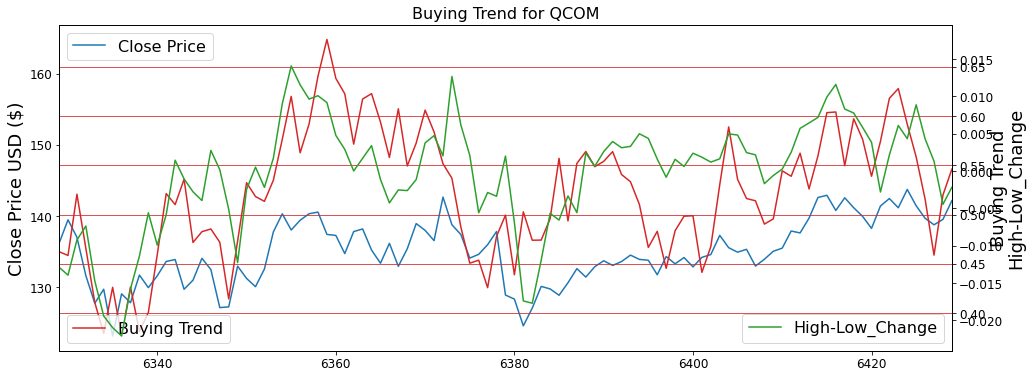

In [58]:
fig, ax1 = plt.subplots()
ax2 =  ax1.twinx()
ax3 =  ax1.twinx()
#ax3.spines.right.set_position(("axes", 1.2))
df1['Trend_Lag'][-150:].ewm(span = period, adjust=False ).mean().plot(x = 'Index', color='tab:red', figsize=(16,6), label = 'Buying Trend', fontsize = 12,ax = ax2)
df1['High-Low_Change_%'][-150:].ewm(span = period, adjust=False ).mean().plot(x = 'Index', color='tab:green', figsize=(16,6), label = 'High-Low_Change', fontsize = 12, ax = ax3)
df1['Close'][-150:].plot(x = 'Index',color = 'tab:blue', figsize=(16,6),  label = 'Close Price',fontsize = 12,ax = ax1)
ax2.set_ylabel('Buying Trend', fontsize = 18)
ax3.set_ylabel('High-Low_Change', fontsize = 18)
ax1.set_ylabel('Close Price USD ($)', fontsize = 18)
plt.xlim([len(df1)-100, len(df1)])
ax2.grid(color='tab:red')
ax1.set_title("Buying Trend for " + stock.upper(), fontsize = 16)
ax2.legend(loc=3, fontsize = 16)
ax3.legend(loc=4, fontsize = 16)
ax1.legend(loc=2,fontsize = 16)
plt.close

In [59]:
#df1.info()

In [60]:
df1.dropna(inplace= True)
X = df1[['const','Trend_Lag','High-Low_Change_%', 'RSI_Lag','Signal_Line_Lag','Volume_Lag']]
y = df1["Up_Down"].values
model = sm.Logit(y,X)
result =  model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.690735
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 6428
Model:                          Logit   Df Residuals:                     6422
Method:                           MLE   Df Model:                            5
Date:                Wed, 21 Jul 2021   Pseudo R-squ.:                0.003467
Time:                        21:51:10   Log-Likelihood:                -4440.0
converged:                       True   LL-Null:                       -4455.5
Covariance Type:            nonrobust   LLR p-value:                 9.826e-06
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3141      0.102      3.068      0.002       0.113       0.515
Trend_Lag            -0.3903      0.089     -4.410      0.000      -0.564      -0.217
High-Low_Change_%    -0.2464      0.581     -0.424      0.671      -1.385       0.892
RSI_Lag              -0.0020      0.002     -1.004      0.315      -0.006       0.002
Signal_Line_Lag       0.0023      0.012      0.185      0.853      -0.022       0.026
Volume_Lag           -0.0003      0.000     -0.730      0.465      -0.001       0.001
=====================================================================================
"""

In [61]:
#data.info()

In [62]:
print("\nIf ${:,.0f} was invested in [ {} ], and Just Hold and Not Trade for {:2d} years, the ROI = ${:,.0f}".format( invest, stock.upper(), diff_years, invest/data.iloc[0, 1] * data.iloc[-1,1]))


If $100 was invested in [ QCOM ], and Just Hold and Not Trade for 26 years, the ROI = $5,227


In [63]:
print ("\nIf ${:,.0f} was invested {:2d} years ago, buy and sell according this script\'s recommandation, the ROI = ${:,.0f}".format(invest, diff_years, (money + (share * df1.iloc[-1,4]))))


If $100 was invested 26 years ago, buy and sell according this script's recommandation, the ROI = $44,030


In [64]:
df1_summary=df1[['Date', 'Up_Down','Prediction_indicator']].copy()
df1_summary['Stock Market Performance'] = df1_summary['Up_Down'].apply(lambda x: 'Up' if x > 0 else 'Down')
df1_summary['Scribe Predection'] = df1_summary['Prediction_indicator'].apply(lambda x: 'Up' if x > 0 else 'Down')
print (df1_summary[['Date','Stock Market Performance','Scribe Predection']].tail(15))

           Date Stock Market Performance Scribe Predection
6415 2021-06-30                       Up              Down
6416 2021-07-01                     Down              Down
6417 2021-07-02                       Up                Up
6418 2021-07-06                     Down              Down
6419 2021-07-07                     Down                Up
6420 2021-07-08                     Down                Up
6421 2021-07-09                       Up              Down
6422 2021-07-12                       Up              Down
6423 2021-07-13                     Down              Down
6424 2021-07-14                       Up                Up
6425 2021-07-15                     Down                Up
6426 2021-07-16                     Down                Up
6427 2021-07-19                     Down                Up
6428 2021-07-20                       Up              Down
6429 2021-07-21                       Up              Down


In [65]:
#print(df1.loc[[i for i in range(len(df1)-20, len(df1)+2)],['Date','Close','Trend_Lag', 'Short_MV_Avg_Span-Long_MV_Avg_Span_Lag']])
#df1.info()

In [66]:
print ("\nToday [ %s ] actually went up," %stock.upper(), end = ' ') if (df1.iloc[-1,13] == 1) else print ("\nToday [ %s ] actually went down," %stock.upper(), end = " ")
print ("--- base on yesterday\'s data, ", end = '')
print ("We Predication [ %s ] should be going up." %stock.upper()) if (df1.iloc[-1,19] == 1) else print ("We Predicae [ %s ] should be going down." %stock.upper())
print ("\n=========> Actual and Predication MATCH <=========") if (df1.iloc[-1,13] == df1.iloc[-1,19]) else print("\n=========> Actual and Predication DO NOT match <=========")


Today [ QCOM ] actually went up, --- base on yesterday's data, We Predicae [ QCOM ] should be going down.

=========> Actual and Predication DO NOT match <=========


In [67]:
x_tran= df1[df1.Date.dt.year < 2021][['const','Trend_Lag','High-Low_Change_%', 'RSI_Lag','Signal_Line_Lag','Volume_Lag']]
y_train=df1[df1.Date.dt.year < 2021]["Up_Down"]
x_test= df1[df1.Date.dt.year >= 2021][['const','Trend_Lag','High-Low_Change_%', 'RSI_Lag','Signal_Line_Lag','Volume_Lag']]
y_test= df1[df1.Date.dt.year >= 2021]["Up_Down"]

In [68]:
model = sm.Logit(y_train,x_tran)
result=model.fit()

Optimization terminated successfully.
         Current function value: 0.690794
         Iterations 4


In [69]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Up_Down   No. Observations:                 6290
Model:                          Logit   Df Residuals:                     6284
Method:                           MLE   Df Model:                            5
Date:                Wed, 21 Jul 2021   Pseudo R-squ.:                0.003385
Time:                        21:51:10   Log-Likelihood:                -4345.1
converged:                       True   LL-Null:                       -4359.9
Covariance Type:            nonrobust   LLR p-value:                 1.832e-05
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3028      0.103      2.934      0.003       0.101       0.505
Trend_Lag            -0.3926      0.089     -4.388      0.000      -0.568      -0.217
High-Low_Change_%    -0.2045      0.583     -0.350      0.726      -1.348       0.939
RSI_Lag              -0.0018      0.002     -0.901      0.367      -0.006       0.002
Signal_Line_Lag       0.0041      0.013      0.320      0.749      -0.021       0.029
Volume_Lag           -0.0003      0.000     -0.673      0.501      -0.001       0.001
=====================================================================================
"""

In [70]:
#summary_list=result.summary().as_csv().split(",")

In [71]:
#print(summary_list)

In [72]:
#print(summary_list[37:39])

In [73]:
prediction = result.predict(x_test)
confusion_matrix(y_test, prediction)

Predict,Down,Up
Actual,,
Down,35,31
Up,28,44


In [74]:
z = confusion_matrix(y_test,prediction)

In [75]:
try:
    print ("\n=========> Prediction Accuracy Rate: %.4f <=========\n"  %((z.loc['Down','Down'] + z.loc['Up','Up']) / len(x_test)))
except:
    print ("\n=========> Predication effectiveness is not avairable <=========\n" )


=========> Prediction Accuracy Rate: 0.5725 <=========



In [76]:
df1.tail(15)

,const,Date,Open,High,Low,Close,Adj Close,Volume,Volume_Lag,Today_Change_%,...,Prediction_Caculated,Prediction_indicator,share,money,Signal_Line,Signal_Line_Lag,Up,Down,RSI,RSI_Lag
6415,1.0,2021-06-30,142.350006,143.630005,141.839996,142.929993,142.929993,-6.327882,3.609962,0.217359,...,0.457335,0,0.000000,46505.858375,-0.286618,-0.442451,0.217359,0.000000,78.748898,78.153950
6416,1.0,2021-07-01,142.910004,143.020004,140.350006,140.800003,140.800003,-5.513435,-6.327882,-1.490233,...,0.490204,0,0.000000,46505.858375,-0.106026,-0.286618,0.000000,-1.490233,64.899903,78.748898
6417,1.0,2021-07-02,141.990005,142.679993,141.250000,142.580002,142.580002,-11.404473,-5.513435,1.264204,...,0.540600,1,327.529099,0.000000,0.074991,-0.106026,1.264204,0.000000,70.012775,64.899903
6418,1.0,2021-07-06,143.000000,143.179993,139.679993,141.190002,141.190002,31.414495,-11.404473,-0.974891,...,0.459384,0,0.000000,46322.438149,0.265212,0.074991,0.000000,-0.974891,62.047319,70.012775
6419,1.0,2021-07-07,142.240005,142.360001,139.059998,139.970001,139.970001,-29.037941,31.414495,-0.864085,...,0.509561,1,325.663924,0.000000,0.448847,0.265212,0.000000,-0.864085,55.635552,62.047319
6420,1.0,2021-07-08,137.720001,138.869995,135.600006,138.289993,138.289993,48.982105,-29.037941,-1.200263,...,0.530651,1,325.663924,0.000000,0.615117,0.448847,0.000000,-1.200263,47.794959,55.635552
6421,1.0,2021-07-09,137.889999,141.729996,137.809998,141.429993,141.429993,-1.970378,48.982105,2.270591,...,0.472316,0,0.000000,45518.045652,0.752868,0.615117,2.270591,0.000000,59.986476,47.794959
6422,1.0,2021-07-12,141.399994,143.020004,141.199997,142.470001,142.470001,-7.708104,-1.970378,0.735352,...,0.455466,0,0.000000,45518.045652,0.887863,0.752868,0.735352,0.000000,63.169913,59.986476
6423,1.0,2021-07-13,142.440002,142.660004,140.419998,141.179993,141.179993,-16.634495,-7.708104,-0.905459,...,0.479754,0,0.000000,45518.045652,1.024984,0.887863,0.000000,-0.905459,56.809620,63.169913
6424,1.0,2021-07-14,143.500000,146.339996,142.500000,143.750000,143.750000,99.832084,-16.634495,1.820376,...,0.522823,1,317.198924,0.000000,1.151519,1.024984,1.820376,0.000000,64.924087,56.809620


In [77]:
High_Low=(df1.iloc[-1,3]-df1.iloc[-2,3])/df1.iloc[-1,3] + ((df1.iloc[-1,4]-df1.iloc[-2,4])/df1.iloc[-1,4])

In [78]:
prediction = result.predict(x_test)
#['const','Trend_Lag','High-Low_Change_%', 'RSI_Lag','Signal_Line_Lag','Volume_Lag']
now_up_down  = result.predict([1.0, df1.iloc[-1, 10], High_Low, df1.iloc[-1, 26] ,df1.iloc[-1, 22], df1.iloc[-1, 7]])
print ("\n=========> Current trend = %.4f,  " %now_up_down, end=' ')
print ("[ %s ] will go up! <=========" %stock.upper()) if now_up_down > cutoff else print ("[ %s ] will go down! <=========" %stock.upper()) 


=========> Current trend = 0.4535,   [ QCOM ] will go down! <=========


In [79]:
#df1['Short_MV_Avg_Span-Long_MV_Avg_Span']

In [80]:
#print ("\n=========> Current trend = %.4f,  " %now_up_down, end=' ')
print ("\n ============> %s Days over %s Days Moving Average Indicator \n ============> %.4f....%.4f....%.4f....%.4f....%.4f....<=============" %(short_moving_average_span, long_moving_average_span, df1.iloc[-5,16], df1.iloc[-4,16], df1.iloc[-3,16], df1.iloc[-2,16],df1.iloc[-1,16]))
if df1.iloc[-1,16] * df1.iloc[-2,16] < 0:
    print ("\n ============> Warning, It Is the Time to Sell [ %s ] <=========" %stock.upper()) if df1.iloc[-1,17] < 0 else print ("\n ============> It Is the Time to Buy [ %s ] ! <=========" %stock.upper())
else:
    print ("\n ============> No Trading Waring at this time! <=============")


 ============> 20 Days over 50 Days Moving Average Indicator 
 ============> 2.2408....2.1532....2.0174....1.9344....2.0019....<=============

 ============> No Trading Waring at this time! <=============


In [81]:
#df1.to_csv('fb.csv', index = False)